# Credit Card Fraud Detection

Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
df = pd.read_csv('creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Process the Unequal Data

In [34]:
df_processed = df.loc[df['Class'] == 1]

In [35]:
df_processed.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [36]:
i = 0
i2 = 0
while True:
    if i2 == 492:
        break
    if df.iloc[i]['Class'] == 0:
        df_processed = df_processed.append(df.iloc[i])
        i2 += 1
    i += 1

In [37]:
df_processed.shape

(984, 31)

In [38]:
y = df_processed['Class']
X = df_processed.iloc[:,:30]

In [39]:
print(y.shape, X.shape)

(984,) (984, 30)


In [40]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
regressor = LogisticRegression().fit(X_train, y_train)

In [43]:
predictions = regressor.predict(X_test)

## Predictions

In [44]:
def get_metrics(y_test, predictions):
    print('confusion matrix:\n{}\n'.format(metrics.confusion_matrix(y_test, predictions)))
    print('f1 score: {}'.format(metrics.f1_score(y_test, predictions)))

In [45]:
get_metrics(y_test, predictions)

confusion matrix:
[[121  40]
 [  2 162]]

f1 score: 0.8852459016393442


## TSNE Metrics

In [46]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [47]:
print(X_embedded.shape)

(984, 2)


In [48]:
x_val = [i[0] for i in X_embedded]
y_val = [i[1] for i in X_embedded]

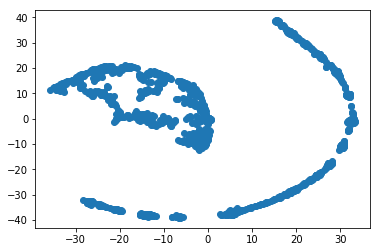

In [49]:
plt.plot(x_val, y_val, 'o')

In [50]:
tsne_df = pd.DataFrame(X_embedded, columns = ['V1', 'V2'])

In [51]:
tsne_df.head()

,V1,V2
0,-35.702206,11.221107
1,-20.777487,1.966304
2,-28.282440,-32.204269
3,-27.731333,-32.532841
4,-27.475670,-33.032890


In [52]:
X = tsne_df

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
regressor = LogisticRegression().fit(X_train, y_train)

In [55]:
predictions = regressor.predict(X_test)

In [56]:
get_metrics(y_test, predictions)

confusion matrix:
[[123  38]
 [ 21 143]]

f1 score: 0.8289855072463768
